<a href="https://colab.research.google.com/github/Meguazy/project_CSD/blob/main/notebook_exploration_cleaning/graph_and_statistics_standard_scaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Schnell_Traino_Project_CSD/NewData/NormalizedData/StandardScaler'

/content/drive/.shortcut-targets-by-id/12FAw9_zBXB7B9mcacT0QJ8gtv4AWA51n/Schnell_Traino_Project_CSD/NewData/NormalizedData/StandardScaler


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
no_guasto_df = pd.read_csv('NO_GUASTO.csv')
guasto_df = pd.read_csv('RUOTA_GUASTA.csv')

# Graphs and statistics on the untouched datasets

In [5]:
no_guasto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633363 entries, 0 to 633362
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Acquisition_Number  633363 non-null  int64  
 1   Discrete_Time       633363 non-null  int64  
 2   Board1Acc1          633363 non-null  float64
 3   Board1Acc2          633363 non-null  float64
 4   Board1Acc3          633363 non-null  float64
 5   Board2Acc1          633363 non-null  float64
 6   Board2Acc2          633363 non-null  float64
 7   Board2Acc3          633363 non-null  float64
 8   Board3Acc1          633363 non-null  float64
 9   Board3Acc2          633363 non-null  float64
 10  Board3Acc3          633363 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 53.2 MB


In [ ]:
no_guasto_df.head()

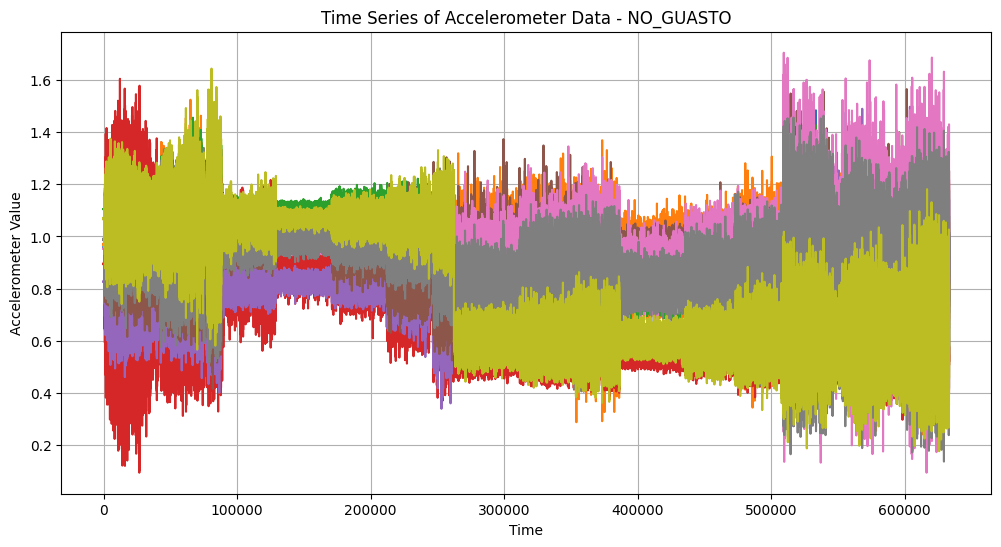

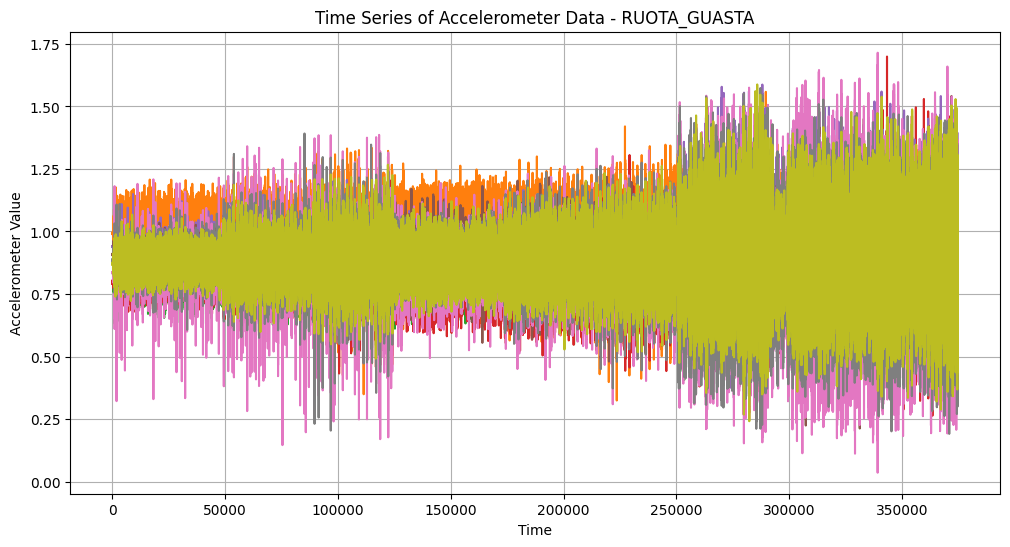

In [ ]:
# Extract time and accelerometer data
time_ng = no_guasto_df['Discrete_Time']
accelerometer_data_ng = no_guasto_df.drop(columns=['Acquisition_Number', 'Discrete_Time'])
time_g = guasto_df['Discrete_Time']
accelerometer_data_g = guasto_df.drop(columns=['Acquisition_Number', 'Discrete_Time'])

# Plot time series data for NO_GUASTO.csv dataset
plt.figure(figsize=(12, 6))
for column in accelerometer_data_ng.columns:
    plt.plot(time_ng, accelerometer_data_ng[column], label=column)
plt.xlabel('Time')
plt.ylabel('Accelerometer Value')
plt.title('Time Series of Accelerometer Data - NO_GUASTO')
plt.grid(True)
plt.show()

# Plot time series data for RUOTA_GUASTA.csv dataset
plt.figure(figsize=(12, 6))
for column in accelerometer_data_g.columns:
    plt.plot(time_g, accelerometer_data_g[column], label=column)
plt.xlabel('Time')
plt.ylabel('Accelerometer Value')
plt.title('Time Series of Accelerometer Data - RUOTA_GUASTA')
plt.grid(True)
plt.show()

In [ ]:
# Select only the board columns for no_guasto_df dataset
no_guasto_board_df = no_guasto_df.filter(like='Board')

# Select only the board columns for guasto_df dataset
guasto_board_df = guasto_df.filter(like='Board')

# Function to calculate average statistics for a given dataset
def calculate_average_stats(data):
    combined_stats = {}

    # Calculate statistics for each accelerometer column
    for col in data.columns:
        all_values = data[col]
        combined_stats[col] = {
            'Sum': all_values.sum(),
            'Mean': all_values.mean(),
            'Median': all_values.median(),
            'Std': all_values.std(),
            'Min': all_values.min(),
            'Max': all_values.max(),
            'Q1': all_values.quantile(0.25),
            'Q3': all_values.quantile(0.75)
        }

    # Compute the average value for each statistic across all accelerometers
    average_combined_stats = {}
    for stat in combined_stats['Board1Acc1'].keys():
        values = [stats[stat] for stats in combined_stats.values()]
        average_combined_stats[stat] = sum(values) / len(values)

    return average_combined_stats

# Calculate average statistics for no_guasto_df dataset
average_stats_no_guasto = calculate_average_stats(no_guasto_board_df)

# Calculate average statistics for guasto_df dataset
average_stats_guasto = calculate_average_stats(guasto_board_df)

# Display the average statistics for no_guasto_df dataset
print("Average Statistics for Accelerometer Data - NO_GUASTO:")
for stat, value in average_stats_no_guasto.items():
    print(f"{stat}: {value}")

# Display the average statistics for guasto_df dataset
print("\nAverage Statistics for Accelerometer Data - RUOTA_GUASTA:")
for stat, value in average_stats_guasto.items():
    print(f"{stat}: {value}")

Average Statistics for Accelerometer Data - NO_GUASTO:
Sum: 550418.8939976344
Mean: 0.8690417564613571
Median: 0.8330808380115635
Std: 0.11872098936107406
Min: 0.20855701141855543
Max: 1.556468082202964
Q1: 0.7920946012398069
Q3: 0.9693500797822023

Average Statistics for Accelerometer Data - RUOTA_GUASTA:
Sum: 329130.72852511576
Mean: 0.8785534677736736
Median: 0.879548067748871
Std: 0.07940011278601662
Min: 0.2426896914128547
Max: 1.5789706986563554
Q1: 0.8514474598664987
Q3: 0.9040216212890001


# Transforming the dataset in order to reflect single time series

Aggtregates all the Board columns into a single one

In [26]:
# Define function for transforming dataframe
def transform_dataframe(df):
    # Calculate the mean of board columns for each row
    df['Mean_Acceleration'] = df.iloc[:, 2:].mean(axis=1)  # Assuming the board columns start from the 3rd column

    # Drop the original board columns
    df.drop(df.iloc[:, 2:-1], axis=1, inplace=True)

    return df

# Transform both dataframes
no_guasto_transformed = transform_dataframe(no_guasto_df)
guasto_transformed = transform_dataframe(guasto_df)

In [25]:
no_guasto_transformed.head()

,Acquisition_Number,Discrete_Time,Mean_Acceleration
0,271,1,0.972618
1,271,2,0.972616
2,271,3,0.972486
3,271,4,0.973013
4,271,5,0.973013


Resets the discrete time for each time series

In [19]:
def reset_discrete_time(df):
    df['Discrete_Time'] = df.groupby('Acquisition_Number').cumcount() + 1
    return df

no_guasto_transformed = reset_discrete_time(no_guasto_transformed)
guasto_transformed = reset_discrete_time(guasto_transformed)

# Plotting the new dataframes

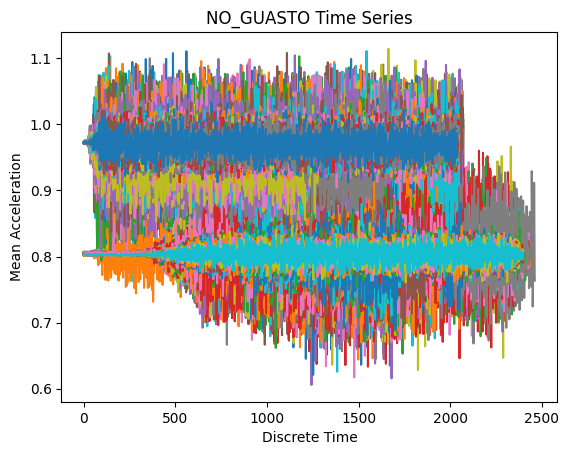

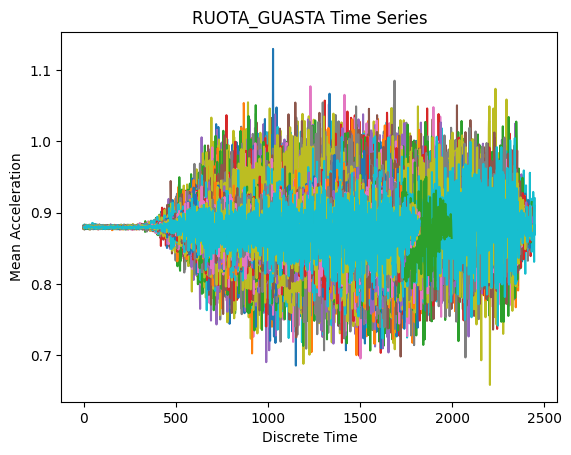

In [20]:
# Function to plot time series
def plot_time_series(df, title):
    grouped = df.groupby('Acquisition_Number')
    for name, group in grouped:
        plt.plot(group['Discrete_Time'], group['Mean_Acceleration'], label=name)
    plt.xlabel('Discrete Time')
    plt.ylabel('Mean Acceleration')
    plt.title(title)
    plt.show()

# Transform and plot for both datasets
plot_time_series(no_guasto_transformed, title='NO_GUASTO Time Series')
plot_time_series(guasto_transformed, title='RUOTA_GUASTA Time Series')

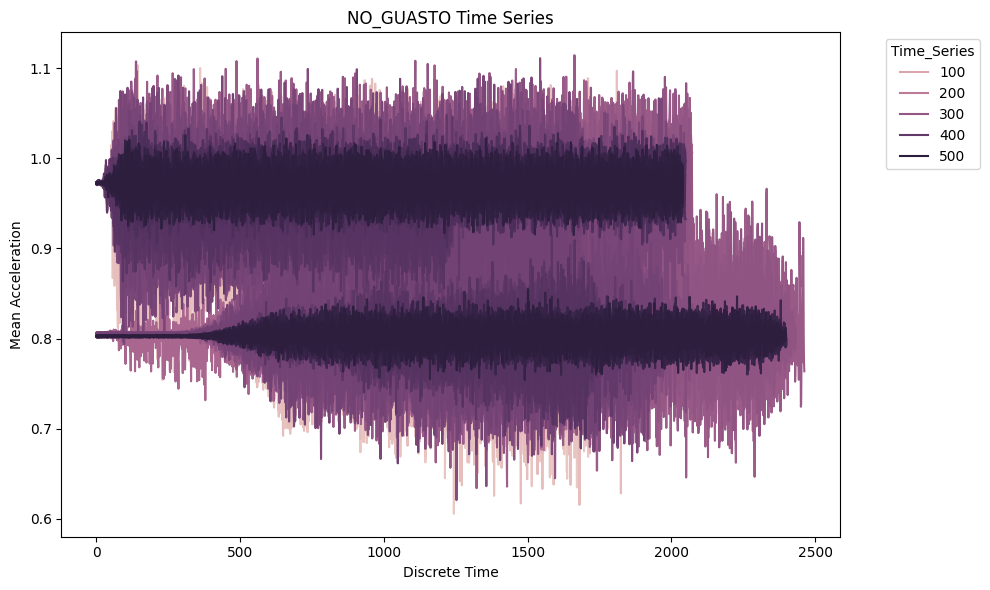

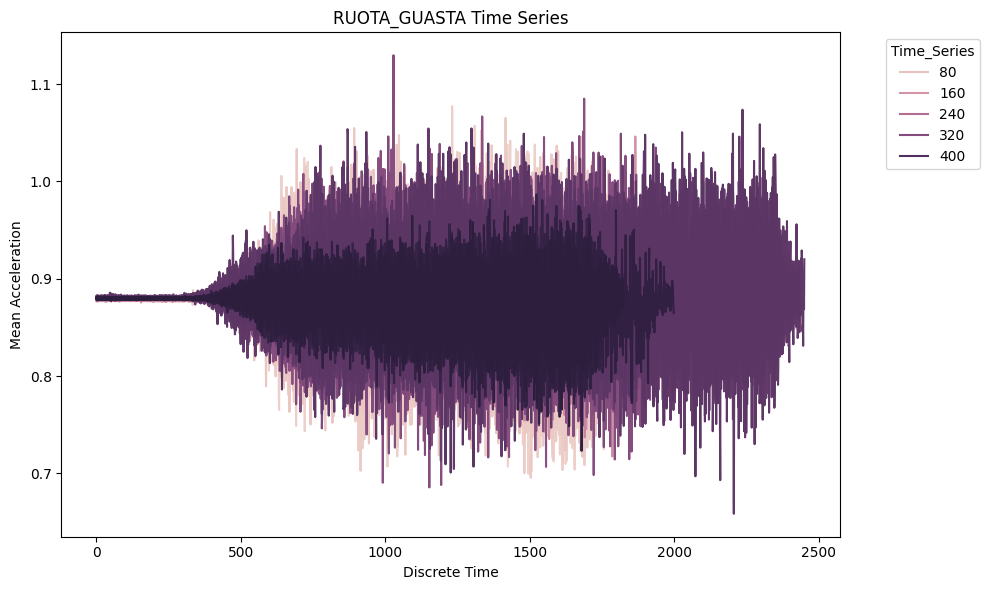

In [24]:
# Function to plot time series using seaborn
def plot_time_series_seaborn(df, title):
    plt.figure(figsize=(10, 6))
    # Rename the Acquisition_Number column to Time_Series for legend title
    df_plot = df.rename(columns={'Acquisition_Number': 'Time_Series'})
    sns.lineplot(x='Discrete_Time', y='Mean_Acceleration', hue='Time_Series', data=df_plot)
    plt.xlabel('Discrete Time')
    plt.ylabel('Mean Acceleration')
    plt.title(title)
    plt.legend(title='Time_Series', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot time series using seaborn for both datasets
plot_time_series_seaborn(no_guasto_transformed, title='NO_GUASTO Time Series')
plot_time_series_seaborn(guasto_transformed, title='RUOTA_GUASTA Time Series')

# Statistics on the aggregated dataframe

In [27]:
# Define function to compute statistics
def compute_statistics(df):
    statistics = df.describe()
    return statistics


no_guasto_transformed = transform_dataframe(no_guasto_df)
guasto_transformed = transform_dataframe(guasto_df)
# Compute statistics for both datasets
no_guasto_statistics = compute_statistics(no_guasto_transformed['Mean_Acceleration'])
guasto_statistics = compute_statistics(guasto_transformed['Mean_Acceleration'])

# Display the computed statistics
print("NO_GUASTO Statistics:")
print(no_guasto_statistics)
print("\nRUOTA_GUASTA Statistics:")
print(guasto_statistics)

NO_GUASTO Statistics:
count    633363.000000
mean          0.869042
std           0.083068
min           0.605729
25%           0.802571
50%           0.821039
75%           0.961297
max           1.114236
Name: Mean_Acceleration, dtype: float64

RUOTA_GUASTA Statistics:
count    374628.000000
mean          0.878553
std           0.026081
min           0.658468
25%           0.868772
50%           0.879375
75%           0.887581
max           1.129597
Name: Mean_Acceleration, dtype: float64
